# Import Libraries

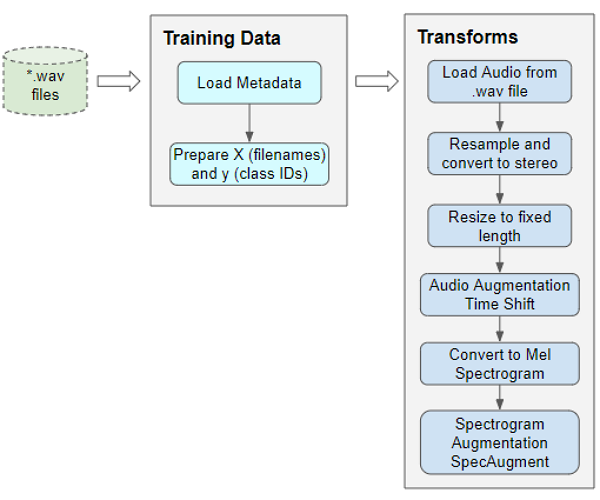

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import logging
import librosa


sns.set_theme()

In [2]:
module_path =os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/scripts")

if module_path not in sys.path:
    sys.path.append(module_path+"/model")



logging.basicConfig(filename='../logs/notebook.log', filemode='w', format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',level=logging.INFO)

In [3]:
#we import our module script that we shall be using for preprocessing
logging.info(" ===== Loading created scripts ===== ")
try:    
    import audio
    logging.info(" ==== Succefully Loaded the Modules ===== ")
    print(" ===== Succefully loaded modules, modules are now ready to use ===== ")
except ImportError as error:
    
    logging.info(" !!!! Import Error  !!!! ")
    print(" !!!! The system ran into an Import Error \n ")
    print(error.__class__.__name__ + ": " + error.message)
    

 ===== Succefully loaded modules, modules are now ready to use ===== 


In [12]:
!pip install pydub

In [4]:
#we read the data
try:
    print("===== Reading Dataset ===== \n ")
    logging.info("====== Redaing Dataset ====== ")
    data=pd.read_csv('../data/merged_data.csv')
    print(" ==== Successfuly read dataset ===== \n")
except FileNotFoundError as e:
        
    logging.info(" !!!! File Not Found Error  !!!! ")
    print(" !!!! The system ran into a File Not Found Erro !!! \n ")
    print(e.__class__.__name__ )
    

===== Reading Dataset ===== 
 
 ==== Successfuly read dataset ===== 



In [5]:
#drop the unwanted columns

data

wav_file  \
0      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
1      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
2      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
3      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
4      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
...                                                  ...   
10174  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10175  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10176  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10177  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10178  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   

                                                    text  length  
0      yanayo andaliwa nami pendo pondo idhaa ya kisw...      51  
1      inayokutangazia moja kwa moja kutoka jijini da...      66  
2      juma hili bara la afrika limeshuhudia raia wa ...      59  
3        wakipiga kura ya maoni ilikufanya mabadiliko ya      47  
4                         kule abidjan raia wa jiji hilo      30  
...                                                  ...     ...  
10174             na somo lile lililopokelewa kule kenya      38  
10175            ambapo mtu aliyeshindwa kwenye uchaguzi      39  
10176        ni kauli yake mchambuzi wa masuala ya siasa      43  
10177  mwanasheria anayemtetea rais wa zamani wa liberia      49  
10178  na kesi yake ya kubadilishana almasi na silaha...      85  

[10179 rows x 3 columns]

In [5]:
#we create a function to add the root folder to the location of each wav file to make a complete path
location_directory='../data/alldata'

def add_root(x):
    x=os.path.join(location_directory,x)
    
    return x

data['Location']=data['wav_file'].apply(lambda x:add_root(x) )

data
    


wav_file  \
0      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
1      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
2      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
3      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
4      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
...                                                  ...   
10174  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10175  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10176  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10177  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10178  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   

                                                    text  length  \
0      yanayo andaliwa nami pendo pondo idhaa ya kisw...      51   
1      inayokutangazia moja kwa moja kutoka jijini da...      66   
2      juma hili bara la afrika limeshuhudia raia wa ...      59   
3        wakipiga kura ya maoni ilikufanya mabadiliko ya      47   
4                         kule abidjan raia wa jiji hilo      30   
...                                                  ...     ...   
10174             na somo lile lililopokelewa kule kenya      38   
10175            ambapo mtu aliyeshindwa kwenye uchaguzi      39   
10176        ni kauli yake mchambuzi wa masuala ya siasa      43   
10177  mwanasheria anayemtetea rais wa zamani wa liberia      49   
10178  na kesi yake ya kubadilishana almasi na silaha...      85   

                                                Location  
0      ../data/alldata/SWH-05-20101106_16k-emission_s...  
1      ../data/alldata/SWH-05-20101106_16k-emission_s...  
2      ../data/alldata/SWH-05-20101106_16k-emission_s...  
3      ../data/alldata/SWH-05-20101106_16k-emission_s...  
4      ../data/alldata/SWH-05-20101106_16k-emission_s...  
...                                                  ...  
10174  ../data/alldata/SWH-15-20110310_16k-emission_s...  
10175  ../data/alldata/SWH-15-20110310_16k-emission_s...  
10176  ../data/alldata/SWH-15-20110310_16k-emission_s...  
10177  ../data/alldata/SWH-15-20110310_16k-emission_s...  
10178  ../data/alldata/SWH-15-20110310_16k-emission_s...  

[10179 rows x 4 columns]

In [34]:
# import librosa
# import librosa.display
# audio, rate= librosa.load(data['Location'][0])
# plt.figure(figsize=(20, 5))
# librosa.display.waveplot(audio, sr=44100)

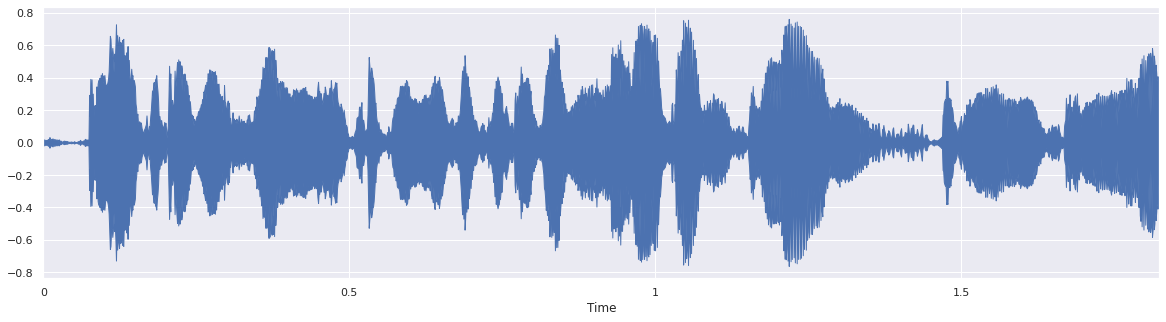

In [6]:
#call the plot wav function from the audio script to plot a sample wav file
audio.plot_wav(data['Location'][1],44100)

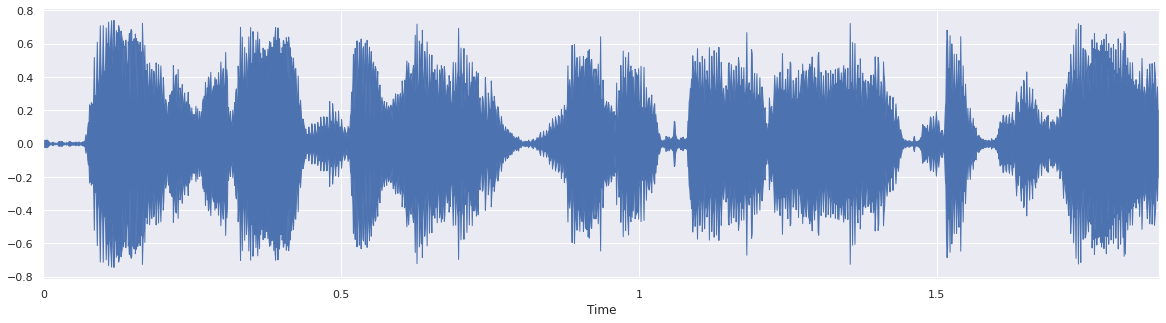

In [12]:
audio.sample_audio_play(data['Location'][0],44100)

In [7]:
#we call the ipython function to confirm our audio and text are correct 
import IPython.display as ipd
ipd.Audio(data['Location'][0],rate=44100)

## Conversion from Mono to Stero 

Audio files can either be mono or stereo, a mono audio has a single channel and hence audio waves travel through that single channel. The stere audio files however have two channels and hence audio waves travel in two channels, they do produce better audio though occupy more space. We shall us only stereo channels in this program and hence need to convert mono audio into stereo by overlaping the current sound i.e playing the same exact sound on a new channel. 

In [7]:
#
data['Location'].apply(lambda x: audio.make_stereo(x))
    

AttributeError: 'str' object has no attribute 'apply'

In [8]:
data

wav_file  \
0      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
1      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
2      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
3      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
4      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
...                                                  ...   
10174  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10175  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10176  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10177  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10178  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   

                                                    text  length  \
0      yanayo andaliwa nami pendo pondo idhaa ya kisw...      51   
1      inayokutangazia moja kwa moja kutoka jijini da...      66   
2      juma hili bara la afrika limeshuhudia raia wa ...      59   
3        wakipiga kura ya maoni ilikufanya mabadiliko ya      47   
4                         kule abidjan raia wa jiji hilo      30   
...                                                  ...     ...   
10174             na somo lile lililopokelewa kule kenya      38   
10175            ambapo mtu aliyeshindwa kwenye uchaguzi      39   
10176        ni kauli yake mchambuzi wa masuala ya siasa      43   
10177  mwanasheria anayemtetea rais wa zamani wa liberia      49   
10178  na kesi yake ya kubadilishana almasi na silaha...      85   

                                                Location  
0      ../data/alldata/SWH-05-20101106_16k-emission_s...  
1      ../data/alldata/SWH-05-20101106_16k-emission_s...  
2      ../data/alldata/SWH-05-20101106_16k-emission_s...  
3      ../data/alldata/SWH-05-20101106_16k-emission_s...  
4      ../data/alldata/SWH-05-20101106_16k-emission_s...  
...                                                  ...  
10174  ../data/alldata/SWH-15-20110310_16k-emission_s...  
10175  ../data/alldata/SWH-15-20110310_16k-emission_s...  
10176  ../data/alldata/SWH-15-20110310_16k-emission_s...  
10177  ../data/alldata/SWH-15-20110310_16k-emission_s...  
10178  ../data/alldata/SWH-15-20110310_16k-emission_s...  

[10179 rows x 4 columns]

## Resampling the Audio

Having audio of the same frequency is crucial in modelling an accurate speech to text model. Most deep learning models that train speech-to-text systems require that all audio is in the same frequcency

In [7]:
#we create a loop that reads all audio and resamples to the specified sampling rate
for files in data['Location']:
    audio.resample_data(files,8000)
    



 ============ Resampling data and overwriting audio  =================
 ========= writing new audio file to location =========== 
 ============ Resampling data and overwriting audio  =================
 ========= writing new audio file to location =========== 
 ============ Resampling data and overwriting audio  =================
 ========= writing new audio file to location =========== 
 ============ Resampling data and overwriting audio  =================
 ========= writing new audio file to location =========== 
 ============ Resampling data and overwriting audio  =================
 ========= writing new audio file to location =========== 
 ============ Resampling data and overwriting audio  =================
 ========= writing new audio file to location =========== 
 ============ Resampling data and overwriting audio  =================
 ========= writing new audio file to location =========== 
 ============ Resampling data and overwriting audio  =================
 ========= writing 

## Resize the Audio

We resize the audio using padding, this involes adding silence to to the start or end of the audio file to give it a particular length

In [12]:
data

wav_file  \
0      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
1      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
2      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
3      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
4      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
...                                                  ...   
10174  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10175  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10176  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10177  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10178  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   

                                                    text  length  \
0      yanayo andaliwa nami pendo pondo idhaa ya kisw...      51   
1      inayokutangazia moja kwa moja kutoka jijini da...      66   
2      juma hili bara la afrika limeshuhudia raia wa ...      59   
3        wakipiga kura ya maoni ilikufanya mabadiliko ya      47   
4                         kule abidjan raia wa jiji hilo      30   
...                                                  ...     ...   
10174             na somo lile lililopokelewa kule kenya      38   
10175            ambapo mtu aliyeshindwa kwenye uchaguzi      39   
10176        ni kauli yake mchambuzi wa masuala ya siasa      43   
10177  mwanasheria anayemtetea rais wa zamani wa liberia      49   
10178  na kesi yake ya kubadilishana almasi na silaha...      85   

                                                Location  
0      ../data/alldata/SWH-05-20101106_16k-emission_s...  
1      ../data/alldata/SWH-05-20101106_16k-emission_s...  
2      ../data/alldata/SWH-05-20101106_16k-emission_s...  
3      ../data/alldata/SWH-05-20101106_16k-emission_s...  
4      ../data/alldata/SWH-05-20101106_16k-emission_s...  
...                                                  ...  
10174  ../data/alldata/SWH-15-20110310_16k-emission_s...  
10175  ../data/alldata/SWH-15-20110310_16k-emission_s...  
10176  ../data/alldata/SWH-15-20110310_16k-emission_s...  
10177  ../data/alldata/SWH-15-20110310_16k-emission_s...  
10178  ../data/alldata/SWH-15-20110310_16k-emission_s...  

[10179 rows x 4 columns]

In [14]:
from pydub import AudioSegment

In [28]:


    
    
for filename in data['Location']: # Loop over all items in the path

      
    print("============ Calculating duration of audio file =================")


    logging.info("============ Calculating duration of audio file =================")
    #pick audio file and let librosa calculate the sample_rate and samples which we shall use to calculate the duration
    audios = AudioSegment.from_wav(filename)
    samples, sample_rate = librosa.load(filename)
    duration=float(len(samples)/sample_rate)
    print('the duration is ', duration)
    

    if duration < 6 :
      x = 6-duration 
      x=x+1
      pad_ms = x * 1000

      
      silence = AudioSegment.silent(duration=pad_ms)
      padded = audios + silence
 
      print('new duration',padded)

      newFilename = filename 
      padded.export(newFilename, format='wav')
      
    
    else:
        print ("========= The audio is 6 seconds long no need for padding ========= ")
    

============ Calculating duration of audio file =================
the duration is  6.999909297052154
new duration <pydub.audio_segment.AudioSegment object at 0x7f1cac43f0d0>


TypeError: write() missing 2 required positional arguments: 'data' and 'samplerate'

In [35]:
import IPython.display as ipd
ipd.Audio(data['Location'][1])

### Augmentation

In [34]:
for files in data['Location']:
    audio.shift(files)
    

In [37]:
import IPython.display as ipd
ipd.Audio(data['Location'][2])

Text(0.5, 0, 'Frequency')

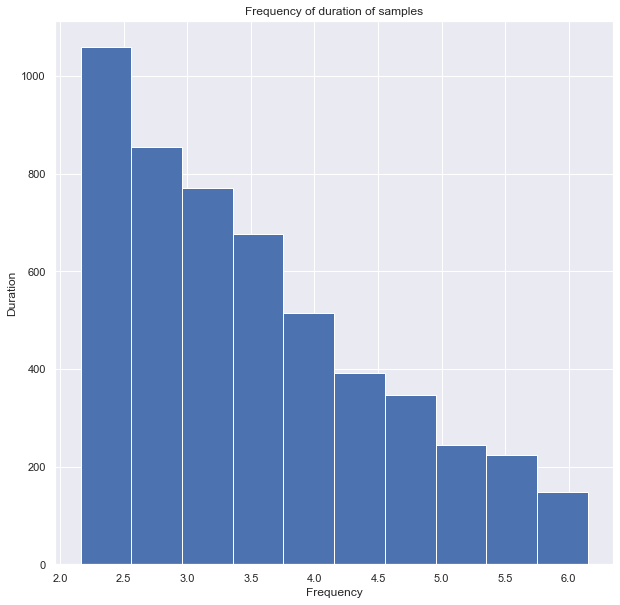

## Feature Extraction 

### MFCC

 ======= Generating mfcc data extraction ========= 
 ========= Extracting features ========== 
  
 ======= Generating mfcc data extraction ========= 
 ========= Extracting features ========== 
  
 ======= Generating mfcc data extraction ========= 
 ========= Extracting features ========== 
  
 ======= Generating mfcc data extraction ========= 
 ========= Extracting features ========== 
  
 ======= Generating mfcc data extraction ========= 
 ========= Extracting features ========== 
  
 ======= Generating mfcc data extraction ========= 
 ========= Extracting features ========== 
  
 ======= Generating mfcc data extraction ========= 
 ========= Extracting features ========== 
  
 ======= Generating mfcc data extraction ========= 
 ========= Extracting features ========== 
  
 ======= Generating mfcc data extraction ========= 
 ========= Extracting features ========== 
  
 ======= Generating mfcc data extraction ========= 
 ========= Extracting features ========== 
  
 ======= Generating 

{'../data/alldata/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part100.wav': [array([[-0.49641994, -0.49641994, -0.49641994, ..., -0.49641994,
          -0.49641994, -0.49641994],
         [-0.42850128, -0.42850128, -0.42850128, ..., -0.42850128,
          -0.42850128, -0.42850128],
         [ 0.16929342,  0.16929342,  0.16929342, ...,  0.16929342,
           0.16929342,  0.16929342],
         ...,
         [-0.00309244, -0.00309244, -0.00309244, ..., -0.00309244,
          -0.00309244, -0.00309244],
         [ 0.04860535,  0.04860535,  0.04860535, ...,  0.04860535,
           0.04860535,  0.04860535],
         [-0.34109512, -0.34109512, -0.34109512, ..., -0.34109512,
          -0.34109512, -0.34109512]], dtype=float32),
  'yanayo andaliwa nami pendo pondo idhaa ya kiswahili'],
 '../data/alldata/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part101.wav': [array([[-0.4908717 , -0.4908717 , -0.4908717 , ..., -0.4908717 ,
          -0.4908717 , -0.490871

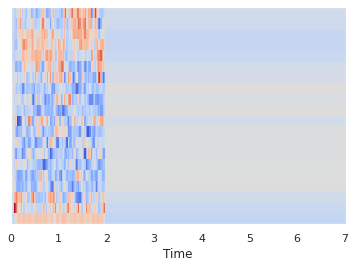

In [6]:
import sklearn

dictMFCC={}
counter=0
for files in data['Location']:
    print(" ======= Generating mfcc data extraction ========= ")
    sampless=audio.mfcc(files)
    print(" ========= Extracting features ========== \n  ")
    dictMFCC[files]=[sampless,data['text'][counter]]
    counter+=1
    
    
dictMFCC    


    

In [7]:
dictMFCC

{'../data/alldata/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part100.wav': [array([[-0.49641994, -0.49641994, -0.49641994, ..., -0.49641994,
          -0.49641994, -0.49641994],
         [-0.42850128, -0.42850128, -0.42850128, ..., -0.42850128,
          -0.42850128, -0.42850128],
         [ 0.16929342,  0.16929342,  0.16929342, ...,  0.16929342,
           0.16929342,  0.16929342],
         ...,
         [-0.00309244, -0.00309244, -0.00309244, ..., -0.00309244,
          -0.00309244, -0.00309244],
         [ 0.04860535,  0.04860535,  0.04860535, ...,  0.04860535,
           0.04860535,  0.04860535],
         [-0.34109512, -0.34109512, -0.34109512, ..., -0.34109512,
          -0.34109512, -0.34109512]], dtype=float32),
  'yanayo andaliwa nami pendo pondo idhaa ya kiswahili'],
 '../data/alldata/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part101.wav': [array([[-0.4908717 , -0.4908717 , -0.4908717 , ..., -0.4908717 ,
          -0.4908717 , -0.490871

In [8]:
data_master=pd.DataFrame.from_dict(dictMFCC, orient ='index')
data_master=data_master.reset_index()

In [9]:
data_master

index  \
0      ../data/alldata/SWH-05-20101106_16k-emission_s...   
1      ../data/alldata/SWH-05-20101106_16k-emission_s...   
2      ../data/alldata/SWH-05-20101106_16k-emission_s...   
3      ../data/alldata/SWH-05-20101106_16k-emission_s...   
4      ../data/alldata/SWH-05-20101106_16k-emission_s...   
...                                                  ...   
10174  ../data/alldata/SWH-15-20110310_16k-emission_s...   
10175  ../data/alldata/SWH-15-20110310_16k-emission_s...   
10176  ../data/alldata/SWH-15-20110310_16k-emission_s...   
10177  ../data/alldata/SWH-15-20110310_16k-emission_s...   
10178  ../data/alldata/SWH-15-20110310_16k-emission_s...   

                                                       0  \
0      [[-0.49641994, -0.49641994, -0.49641994, -0.20...   
1      [[-0.4908717, -0.4908717, -0.4908717, -0.23623...   
2      [[-0.5066257, -0.5066257, -0.5066257, -0.31737...   
3      [[-0.43264997, -0.43264997, -0.43264997, -0.14...   
4      [[-0.3877617, -0.3877617, -0.3877617, -0.14148...   
...                                                  ...   
10174  [[-0.39165846, -0.39165846, -0.39165846, -0.39...   
10175  [[-0.42376482, -0.42376482, -0.42376482, -0.39...   
10176  [[-0.4276973, -0.4276973, -0.4276973, -0.34058...   
10177  [[-0.39947417, -0.39947417, -0.39947417, -0.27...   
10178  [[-0.5991324, -0.5991324, -0.5991324, 0.062727...   

                                                       1  
0      yanayo andaliwa nami pendo pondo idhaa ya kisw...  
1      inayokutangazia moja kwa moja kutoka jijini da...  
2      juma hili bara la afrika limeshuhudia raia wa ...  
3        wakipiga kura ya maoni ilikufanya mabadiliko ya  
4                         kule abidjan raia wa jiji hilo  
...                                                  ...  
10174             na somo lile lililopokelewa kule kenya  
10175            ambapo mtu aliyeshindwa kwenye uchaguzi  
10176        ni kauli yake mchambuzi wa masuala ya siasa  
10177  mwanasheria anayemtetea rais wa zamani wa liberia  
10178  na kesi yake ya kubadilishana almasi na silaha...  

[10179 rows x 3 columns]

In [10]:
data_master.columns=['wav_file','samples','text']
data_master

wav_file  \
0      ../data/alldata/SWH-05-20101106_16k-emission_s...   
1      ../data/alldata/SWH-05-20101106_16k-emission_s...   
2      ../data/alldata/SWH-05-20101106_16k-emission_s...   
3      ../data/alldata/SWH-05-20101106_16k-emission_s...   
4      ../data/alldata/SWH-05-20101106_16k-emission_s...   
...                                                  ...   
10174  ../data/alldata/SWH-15-20110310_16k-emission_s...   
10175  ../data/alldata/SWH-15-20110310_16k-emission_s...   
10176  ../data/alldata/SWH-15-20110310_16k-emission_s...   
10177  ../data/alldata/SWH-15-20110310_16k-emission_s...   
10178  ../data/alldata/SWH-15-20110310_16k-emission_s...   

                                                 samples  \
0      [[-0.49641994, -0.49641994, -0.49641994, -0.20...   
1      [[-0.4908717, -0.4908717, -0.4908717, -0.23623...   
2      [[-0.5066257, -0.5066257, -0.5066257, -0.31737...   
3      [[-0.43264997, -0.43264997, -0.43264997, -0.14...   
4      [[-0.3877617, -0.3877617, -0.3877617, -0.14148...   
...                                                  ...   
10174  [[-0.39165846, -0.39165846, -0.39165846, -0.39...   
10175  [[-0.42376482, -0.42376482, -0.42376482, -0.39...   
10176  [[-0.4276973, -0.4276973, -0.4276973, -0.34058...   
10177  [[-0.39947417, -0.39947417, -0.39947417, -0.27...   
10178  [[-0.5991324, -0.5991324, -0.5991324, 0.062727...   

                                                    text  
0      yanayo andaliwa nami pendo pondo idhaa ya kisw...  
1      inayokutangazia moja kwa moja kutoka jijini da...  
2      juma hili bara la afrika limeshuhudia raia wa ...  
3        wakipiga kura ya maoni ilikufanya mabadiliko ya  
4                         kule abidjan raia wa jiji hilo  
...                                                  ...  
10174             na somo lile lililopokelewa kule kenya  
10175            ambapo mtu aliyeshindwa kwenye uchaguzi  
10176        ni kauli yake mchambuzi wa masuala ya siasa  
10177  mwanasheria anayemtetea rais wa zamani wa liberia  
10178  na kesi yake ya kubadilishana almasi na silaha...  

[10179 rows x 3 columns]

In [12]:
data_master.to_csv('../data/mfccFeatured.csv',index=False)

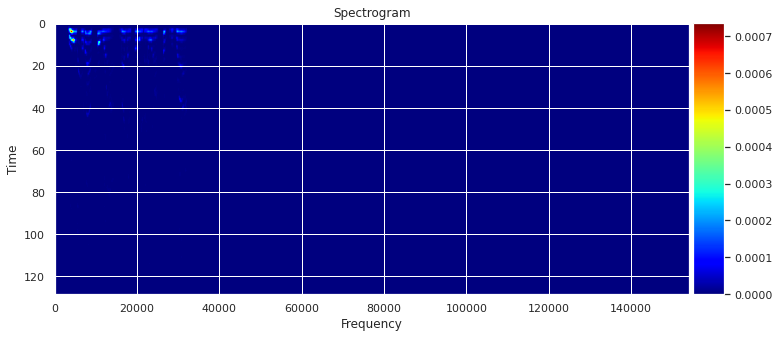

In [13]:
audio.plot_spectogram(data_master['wav_file'][0])

This is a time-frequency spectogram. It inidicates the frequcny of the sound at a given time,The color scale on the left indicates the frequcny with deeper colors inidcating lower frequencies.This particular audio file indicates higher frequencies in as the audio clip begins and the audio clip only lasts for a few seconds and hence why it dulls out to no frequencies qucickly

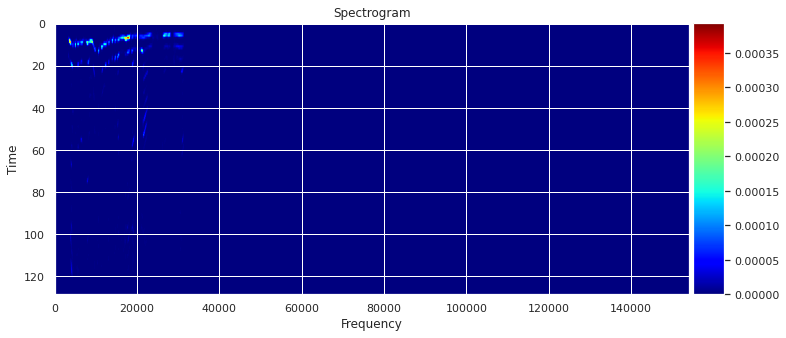

In [14]:
audio.plot_spectogram(data['Location'][1])

### Mel Spectogram

In [23]:
# spectro_augment(data_master['samples'][0])

In [20]:
y, sr = librosa.load(data_master['wav_file'][0])
librosa.feature.melspectrogram(y=y, sr=sr)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                    fmax=8000)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

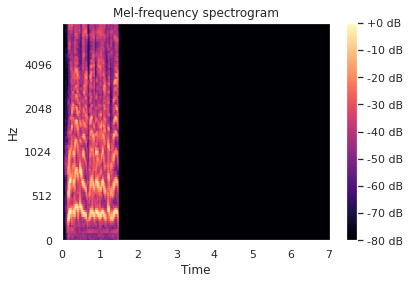

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [26]:
melSpec=[]

for files in data_master['wav_file']:
    
    try:
        print("======= Featching Audio ===== " )
        samp,sr=librosa.load(files)
        print("===== Creating melSpectrogram =======" )
        melspec=librosa.feature.melspectrogram(y=samp,sr=sr,n_mels=128,fmax=8000)
        print("===== Successfully Calculated ========== \n ")

        melSpec.append(melspec)
    except Exception as e:
        
        print (" ====== Ran into an Error ======== ")

    
    
    
    

======= Featching Audio ===== 
===== Creating melSpectrogram =======
===== Successfully Calculated ========== 
 
======= Featching Audio ===== 
===== Creating melSpectrogram =======
===== Successfully Calculated ========== 
 
======= Featching Audio ===== 
===== Creating melSpectrogram =======
===== Successfully Calculated ========== 
 
======= Featching Audio ===== 
===== Creating melSpectrogram =======
===== Successfully Calculated ========== 
 
======= Featching Audio ===== 
===== Creating melSpectrogram =======
===== Successfully Calculated ========== 
 
======= Featching Audio ===== 
===== Creating melSpectrogram =======
===== Successfully Calculated ========== 
 
======= Featching Audio ===== 
===== Creating melSpectrogram =======
===== Successfully Calculated ========== 
 
======= Featching Audio ===== 
===== Creating melSpectrogram =======
===== Successfully Calculated ========== 
 
======= Featching Audio ===== 
===== Creating melSpectrogram =======
===== Successfully Calculat

In [29]:
data_master['mel_spec']=melSpec

In [31]:
data_master.to_csv("../data/specData.csv",index=False)

In [51]:
from sklearn.preprocessing import LabelEncoder

y=data_master['text']

encoder=LabelEncoder()
y=encoder.fit_transform(y)
classes=list(encoder.classes_)



In [54]:
classes

['16k-emission_swahili_05h30_-_06h00_tu_20101121_part210',
 '16k-emission_swahili_05h30_-_06h00_tu_20101123_part195',
 '<UNK>',
 '<UNK> alisitisha uchimbaji wa madini katika maeneo ya kivu kaskazini kivu kusini na maniema',
 '<UNK> ambao umeonekana huko ndio <UNK> ma',
 '<UNK> eeh ndugu msikilizaji unaendelea kuwa nami edmilo wangi cheli',
 '<UNK> hatua hiyo imechukuliwa wakati huu',
 '<UNK> hii inalenga waafrika na haiguzi wale wengine',
 '<UNK> hilo ndio jambo ambalo mimi naona la msingi sana jambo nzuri sana',
 '<UNK> hususan kulipiwa karo mashuleni na gharama za hospitali',
 '<UNK> imeirudisha chini sana',
 '<UNK> inalenga waafrika na haiguzi wale wengine',
 '<UNK> juu ya kesi hiyo inawakabili',
 '<UNK> kama percentage kama themanini',
 '<UNK> kitu pekee ni kuwa watakaogundulika kufanya udanganyifu huo',
 '<UNK> kuendelea huku nchini kwao anasema kwamba hile gazeti la sunday times',
 '<UNK> kufanikisha hilo',
 '<UNK> kufikia kesho tunafanya bidii sana',
 '<UNK> kwa kuwa imesababish

In [57]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(data_master))

In [60]:
resmaple = np.array(resample).reshape(-1,8000,1)

In [61]:
resample

[array([ 0.00386104,  0.00561212,  0.00383458, ...,  0.03412592,
        -0.02370067,  0.01644961], dtype=float32),
 array([0.00607792, 0.00734194, 0.00941597, ..., 0.17351705, 0.2001552 ,
        0.        ], dtype=float32),
 array([-0.00760717, -0.01193155, -0.0097027 , ..., -0.27007535,
        -0.3289366 , -0.2028154 ], dtype=float32),
 array([0.00830972, 0.01390544, 0.01246122, ..., 0.0255863 , 0.02915221,
        0.0439747 ], dtype=float32),
 array([ 0.00132559,  0.00054344, -0.00073986, ..., -0.17921087,
        -0.09451021,  0.        ], dtype=float32),
 array([0.00337743, 0.00840342, 0.00710637, ..., 0.17063653, 0.13628258,
        0.08041241], dtype=float32),
 array([0.00417878, 0.00664741, 0.00548905, ..., 0.06925223, 0.12979895,
        0.11708841], dtype=float32),
 array([-0.00173427, -0.00206189, -0.00133683, ..., -0.05295629,
        -0.21929432,  0.        ], dtype=float32),
 array([-8.6947752e-05, -8.3921076e-04, -1.9680166e-03, ...,
        -2.6431957e-03, -3.4548420e

In [1]:
def text_to_int_sequence(text):
    """ Convert text to an integer sequence """
    int_sequence = []
    for c in text:
        if c == ' ':
            ch = char_map['<SPACE>']
        else:
            # print("checking character " + c + " in map:")
            # print(char_map)
            ch = char_map[c]
        int_sequence.append(ch)
    return int_sequence

In [2]:
import pandas as pd
data=pd.read_csv('../data/specData.csv')

In [7]:
data

wav_file  \
0      ../data/alldata/SWH-05-20101106_16k-emission_s...   
1      ../data/alldata/SWH-05-20101106_16k-emission_s...   
2      ../data/alldata/SWH-05-20101106_16k-emission_s...   
3      ../data/alldata/SWH-05-20101106_16k-emission_s...   
4      ../data/alldata/SWH-05-20101106_16k-emission_s...   
...                                                  ...   
10174  ../data/alldata/SWH-15-20110310_16k-emission_s...   
10175  ../data/alldata/SWH-15-20110310_16k-emission_s...   
10176  ../data/alldata/SWH-15-20110310_16k-emission_s...   
10177  ../data/alldata/SWH-15-20110310_16k-emission_s...   
10178  ../data/alldata/SWH-15-20110310_16k-emission_s...   

                                                 samples  \
0      [[-0.49641994 -0.49641994 -0.49641994 ... -0.4...   
1      [[-0.4908717  -0.4908717  -0.4908717  ... -0.4...   
2      [[-0.5066257  -0.5066257  -0.5066257  ... -0.5...   
3      [[-0.43264997 -0.43264997 -0.43264997 ... -0.4...   
4      [[-0.3877617  -0.3877617  -0.3877617  ... -0.3...   
...                                                  ...   
10174  [[-0.39165846 -0.39165846 -0.39165846 ... -0.3...   
10175  [[-0.42376482 -0.42376482 -0.42376482 ... -0.4...   
10176  [[-0.4276973  -0.4276973  -0.4276973  ... -0.4...   
10177  [[-0.39947417 -0.39947417 -0.39947417 ... -0.3...   
10178  [[-0.5991324  -0.5991324  -0.5991324  ... -0.5...   

                                                    text  \
0      yanayo andaliwa nami pendo pondo idhaa ya kisw...   
1      inayokutangazia moja kwa moja kutoka jijini da...   
2      juma hili bara la afrika limeshuhudia raia wa ...   
3        wakipiga kura ya maoni ilikufanya mabadiliko ya   
4                         kule abidjan raia wa jiji hilo   
...                                                  ...   
10174             na somo lile lililopokelewa kule kenya   
10175            ambapo mtu aliyeshindwa kwenye uchaguzi   
10176        ni kauli yake mchambuzi wa masuala ya siasa   
10177  mwanasheria anayemtetea rais wa zamani wa liberia   
10178  na kesi yake ya kubadilishana almasi na silaha...   

                                                mel_spec  
0      [[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....  
1      [[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....  
2      [[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....  
3      [[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....  
4      [[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....  
...                                                  ...  
10174  [[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....  
10175  [[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....  
10176  [[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....  
10177  [[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....  
10178  [[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....  

[10179 rows x 4 columns]

In [8]:
mel_data=data[['mel_spec','text']]
mel_data

mel_spec  \
0      [[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....   
1      [[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....   
2      [[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....   
3      [[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....   
4      [[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....   
...                                                  ...   
10174  [[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....   
10175  [[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....   
10176  [[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....   
10177  [[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....   
10178  [[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....   

                                                    text  
0      yanayo andaliwa nami pendo pondo idhaa ya kisw...  
1      inayokutangazia moja kwa moja kutoka jijini da...  
2      juma hili bara la afrika limeshuhudia raia wa ...  
3        wakipiga kura ya maoni ilikufanya mabadiliko ya  
4                         kule abidjan raia wa jiji hilo  
...                                                  ...  
10174             na somo lile lililopokelewa kule kenya  
10175            ambapo mtu aliyeshindwa kwenye uchaguzi  
10176        ni kauli yake mchambuzi wa masuala ya siasa  
10177  mwanasheria anayemtetea rais wa zamani wa liberia  
10178  na kesi yake ya kubadilishana almasi na silaha...  

[10179 rows x 2 columns]

In [11]:
from torch.utils.data import random_split

num_items=len(mel_data)
train_num=round(num_items * .8)
value_num=num_items - train_num
train,val=random_split(mel_data,[train_num,value_num])

In [13]:
import torch

In [15]:
train=torch.utils.data.DataLoader(train,batch_size=16,shuffle=True)
validation=torch.utils.data.DataLoader(val,batch_size=16,shuffle=False)


In [18]:
!pip install mlflow

     |████████████████████████████████| 14.4 MB 56.7 MB/s eta 0:00:01


In [19]:
import mlflow

In [52]:
mapss=[]
for texts in data['text']:
    charlist=[]
    for characters in texts:
        
            
    #     ord(characters)
        charlist.append(ord(characters))
    mapss.append(charlist)


In [54]:
data['TextMap']=mapss

In [67]:
y=data['TextMap']
X=data['mel_spec']

In [65]:
x_train, x_valid, y_train, y_valid = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size=0.2,random_state=777,shuffle=True)

In [69]:
import numpy as np
z=np.array(X)

In [70]:
z

array(['[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]\n ...\n [0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]]',
       '[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]\n ...\n [0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]]',
       '[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]\n ...\n [0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]]',
       ...,
       '[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]\n ...\n [0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]]',
       '[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]\n ...\n [0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]]',
       '[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]\n ...\n [0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0.